# Micro-Credit Defaulter Model

## Data Description 

The is about Micro-finance Institution(MFI) is organication that offers financial service to low income populations, especially the unbanked poor families living in remote areas with not much source of income. The MFI are provided Group Loans, Agricultural Loans, Individual Business Loans and so on as their services. 

They plan to indroduce a new servies on mobile financial services(MFS) which they feel are more convenient and efficient, and cos saving, than the traditional high-touch model used in long for purpose of delivering microfinance service, primarily focusing on low income families, MFS has been uneven with both significant challenges and sucesses.

They are collaboratin with an MFI to provide micro-credit on mobile balance to be paid back in 5 days,with small budgets like 5 in Indonesian Rupiah, pay back amount shoulbe be 6 in Indonesian Rupiah.The sample data is provided to improve the selection of customer for the credit, the predictions that could help them in further investment and imporve in selection of customers.

Building a model which can be use to predict in terms of aprobability for each loan transaction whether the customer will be paying back the loaned amount with in 5 day of insurance of loan. In this case, Label '1' indicates that the loan has been payed i.e Non-defaulter,
while Label '0' indicates that the loan has not been payed i.e defaulter.

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import skew
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV 
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df=pd.read_csv('Data_file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 37 columns]

In [4]:
df.shape

(209593, 37)

we have 209593 rows and 37 columns 

### EDA of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

we have msisdn,pcircle, pdate as object dtype and remaining columns as int64 and float64 type

we need to change pdate column as datetime type

In [6]:
df['pdate']=pd.to_datetime(df['pdate'])

In [7]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is no null or non values in the give data

In [9]:
np.unique(df['pcircle'])

array(['UPW'], dtype=object)

we have only one value to all the rows in pcircle column

In [10]:
df.shape

(209593, 37)

here we are droping 4 columns 
Unnamed: 0[which is just a s], msisdn,pcircle,pdate

In [11]:
df1=df.drop(columns=["Unnamed: 0","msisdn","pcircle","pdate"],axis=1)

In [12]:
df1.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

## Summary statistics

In [13]:
df1.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

Observation
1.The mean is more than median (50th percentile) in all columns except label column
2.There is a large difference in 75th percentile and max in all columns except label column
3.The 1 an 2 observations sugguest that there are extreme outliers present

## Data Visualization

In [14]:
df1.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

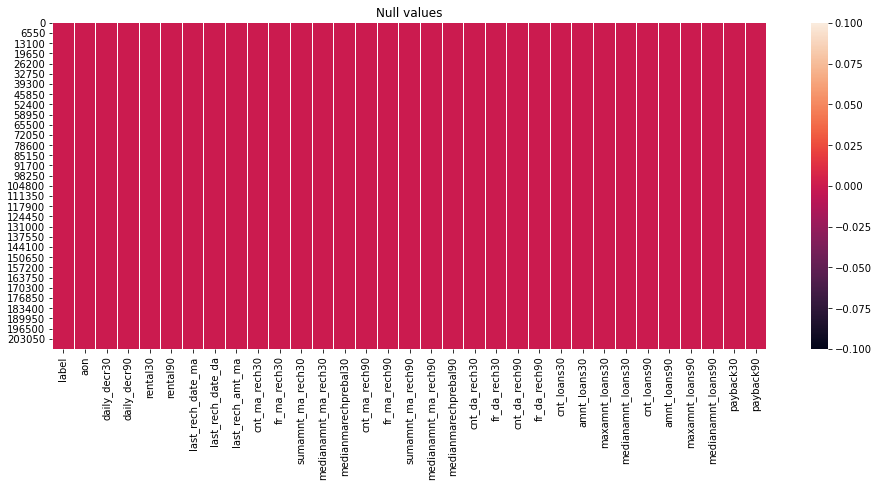

In [15]:
plt.figure(figsize=[16,6])
sns.heatmap(df1.isnull())
plt.title("Null values")
plt.show()

There are no null values in the dataset.If there were any, you would've in fugure represented by different colour shade

In [16]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


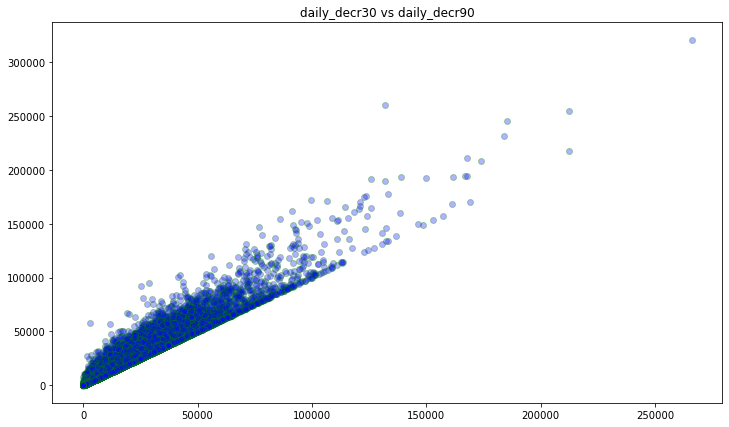

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(df1["daily_decr30"],df["daily_decr90"],alpha=0.3,c=(0,0,1),edgecolor='g')
plt.title("daily_decr30 vs daily_decr90")
plt.show()

### To check correlation

In [18]:
dfcor=df1.corr()
dfcor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

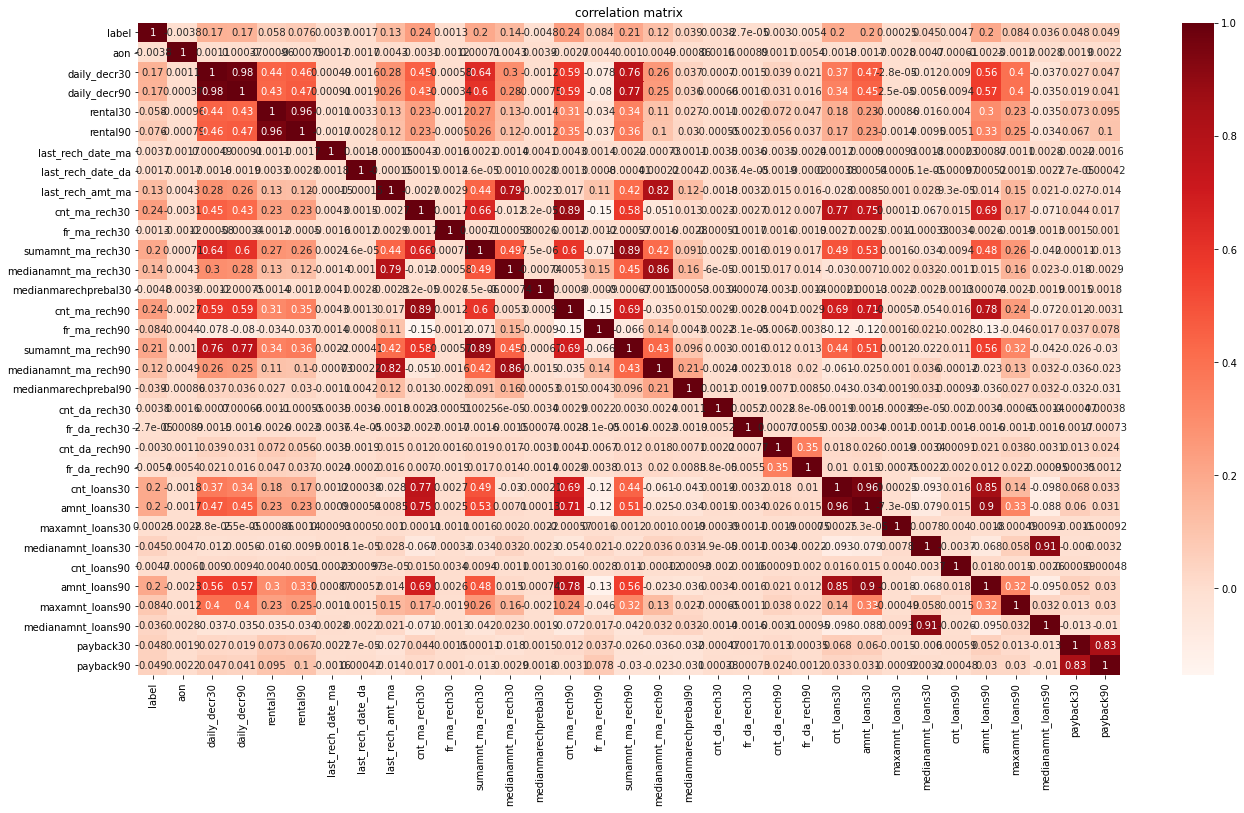

In [19]:
plt.figure(figsize=(22,12))
sns.heatmap(dfcor,cmap='Reds',annot=True)
plt.title("correlation matrix")
plt.show()

Observations:We are unable to identify the correlation in above heatmap due to huge number of columns. Let's print the correlation values of independent variables with target variable sorted from

In [20]:
corr_matrix=df1.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

Now we can clearly identify the correlation of independent variable with taeget variable"lable".There are around 10 variables who has less then 0.01 correlation value(very week relationship)

That means there is no relation between variable, there are no effect of those variables on target variables 

droping the variables which has less correlation with label(which is our target variable)

In [21]:
df_new=df1.drop(columns=["aon","last_rech_date_ma","last_rech_date_da","fr_ma_rech30","medianmarechprebal30","cnt_da_rech30","cnt_loans90","cnt_da_rech90","fr_da_rech30","maxamnt_loans30","medianamnt_loans30","medianamnt_loans90","fr_da_rech90"],axis=1)

In [22]:
df_new.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0      0   3055.050000   3065.150000    220.13    260.13              1539   
1      1  12122.000000  12124.750000   3691.26   3691.26              5787   
2      1   1398.000000   1398.000000    900.13    900.13              1539   
3      1     21.228000     21.228000    159.42    159.42               947   
4      1    150.619333    150.619333   1098.90   1098.90              2309   

   cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
0              2             3078.0                1539.0              2   
1              1             5787.0                5787.0              1   
2              1             1539.0                1539.0              1   
3              0                0.0                   0.0              1   
4              7            20029.0                2309.0              8   

   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0            21               3078                1539.0   
1             0               5787                5787.0   
2             0               1539                1539.0   
3             0                947                 947.0   
4             2              23496                2888.0   

   medianmarechprebal90  cnt_loans30  amnt_loans30  amnt_loans90  \
0                  7.50            2            12            12   
1                 61.04            1            12            12   
2                 66.32            1             6             6   
3                  2.50            2            12            12   
4                 35.00            7            42            42   

   maxamnt_loans90  payback30  payback90  
0                6  29.000000  29.000000  
1               12   0.000000   0.000000  
2                6   0.000000   0.000000  
3                6   0.000000   0.000000  
4                6   2.333333   2.333333

In [24]:
df_new.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

### Defining functions 

In [25]:
#function for check data is Noramally Distributed

from scipy  import  stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")

In [26]:
# function to plot histogram

def hist(data_frame,feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(16,10))
    sns.distplot(data_frame[feature_name],color='orange')
    

In [27]:
# Function for make Boxplot

def boxplot(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name],color='red')

In [28]:
#for normal distributed

def outlier_norm(data_frame,feature):
    uppper_boundary=data_frame[feature].mean() + 3* data_frame[feature].std()
    lower_boundary=data_frame[feature].mean() - 3* data_frame[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

In [29]:
# for skewed outliers 

def outlier_IQR(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

In [30]:
#for extreme outliers

def outlier_extreme(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*3)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*3)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

### checking outtliers 

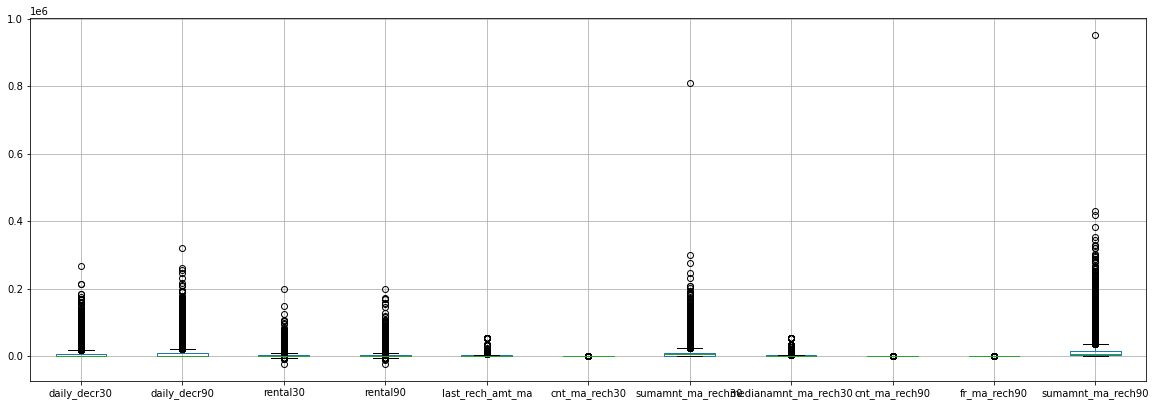

In [31]:
#plotting boxplots for first 10 columns
df_new.iloc[:,1:12].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

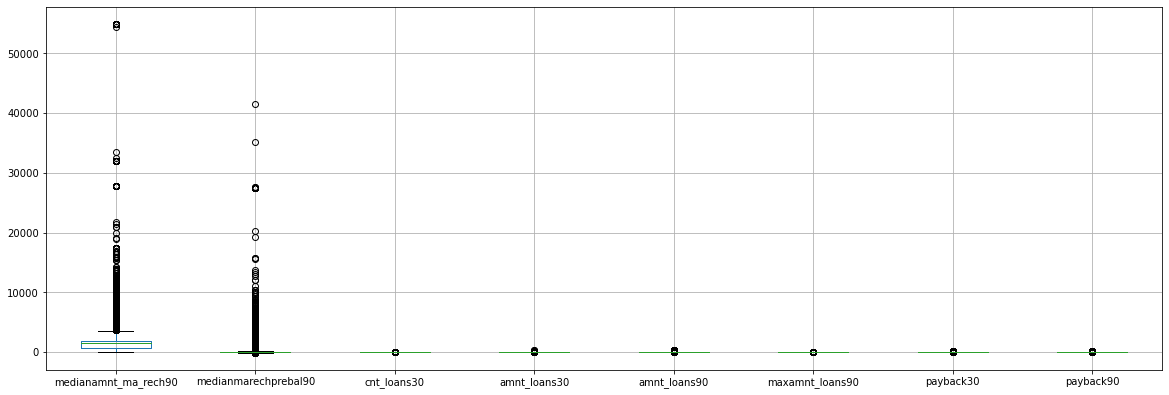

In [32]:
#plotting boxplots for next 10 columns
df_new.iloc[:,12:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

almost all the features having outliers

In [33]:
df_new.shape

(209593, 20)

### daily_decr30 feature

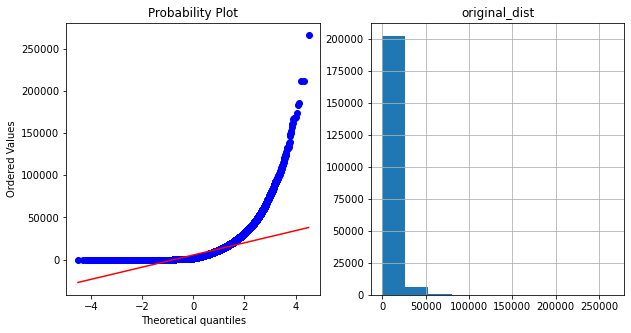

In [34]:
original_dist(df_new,'daily_decr30')

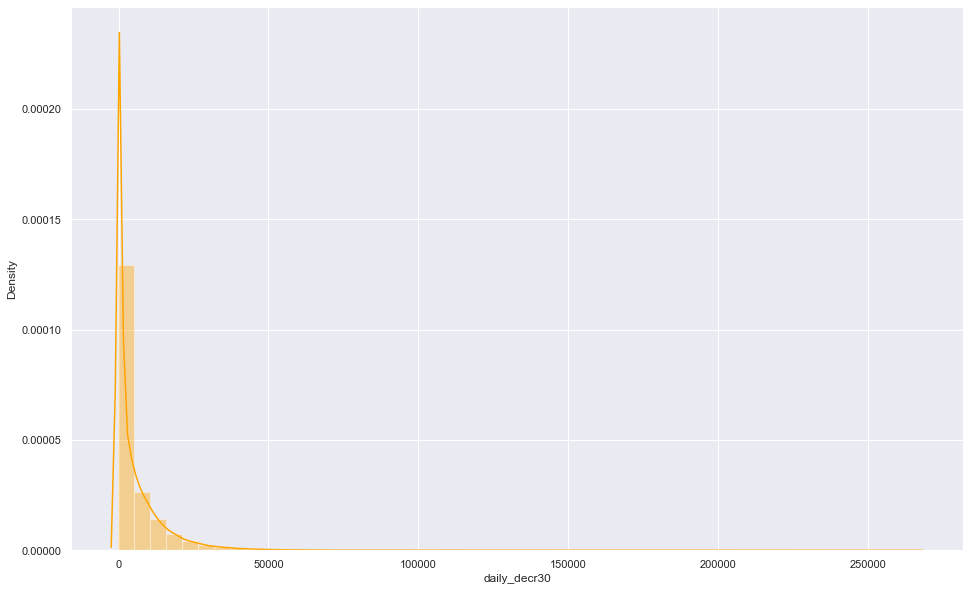

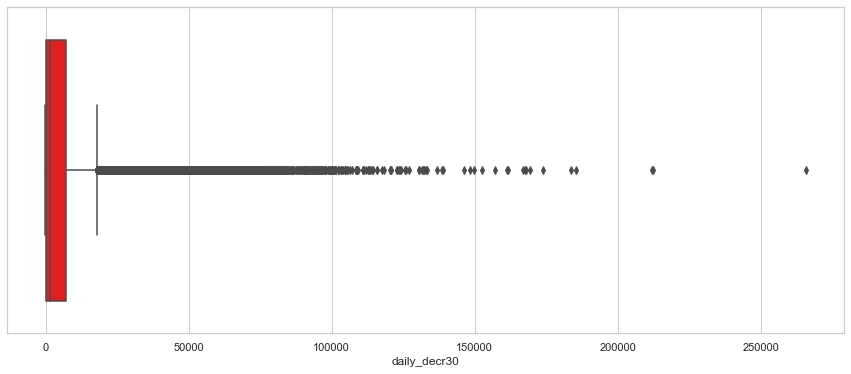

In [35]:
hist(df_new,'daily_decr30')

boxplot(df_new,'daily_decr30')

In [36]:
outlier_extreme(df_new,'daily_decr30')

lower_boundary: -21562.24
uppper_boundary 28848.68


In [37]:
#In daily_decr30 more than 28848.68 values consider as outliers

df_new.loc[df_new['daily_decr30']>28848.68,'daily_decr30']=28848.68

In [38]:
df_new[df_new['daily_decr30']>=28848.68]

label  daily_decr30  daily_decr90  rental30  rental90  \
36          1      28848.68      38935.57   4662.68   5416.68   
114         1      28848.68      37204.42   7199.75  11131.96   
130         1      28848.68      52266.89   6394.29   8163.82   
142         1      28848.68      39567.48   3301.65   5061.54   
150         1      28848.68      31023.27   9707.45  10180.73   
...       ...           ...           ...       ...       ...   
209277      1      28848.68      58127.00   4903.20   8794.78   
209297      1      28848.68      59686.79   6876.45  13617.11   
209346      1      28848.68      69834.96  17807.12  20460.38   
209365      1      28848.68      41556.75   1999.11   3166.41   
209578      1      28848.68      45485.28   8438.77  14562.40   

        last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
36                  4048             10            29475.0   
114                  770              9            25235.0   
130                 2309             13            28775.0   
142                 1539             16            25394.0   
150                  770             18            30320.0   
...                  ...            ...                ...   
209277              1539             30            36173.0   
209297              1539             26            44931.0   
209346               770             11            20010.0   
209365              2309              7            25827.0   
209578              1539              5             6926.0   

        medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
36                    2309.0             20             4              50839   
114                   1539.0             19             4              44111   
130                   2309.0             34             2              81144   
142                   1539.0             30             2              47710   
150                   1539.0             25             0              41113   
...                      ...            ...           ...                ...   
209277                1539.0             75             1              87817   
209297                1539.0             50             1              81875   
209346                1539.0             16             1              28476   
209365                2309.0             10             1              34700   
209578                1539.0             25             2              27715   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  \
36                    2309.0                 62.74            6            54   
114                   1539.0                 10.80            6            36   
130                   2309.0                 26.00           10           114   
142                   1539.0                 66.50           10           102   
150                   1539.0                354.51            3            24   
...                      ...                   ...          ...           ...   
209277                1539.0                 57.00           19           114   
209297                1539.0                123.00            0             0   
209346                1539.0                121.50            7            54   
209365                2309.0                138.00            4            36   
209578                 773.0                 53.63            5            42   

        amnt_loans90  maxamnt_loans90  payback30  payback90  
36               108               12   2.000000   1.875000  
114               78                6   2.375000   2.714286  
130              204               12   1.909091   1.888889  
142              162               12   2.000000   2.217391  
150               24               12   3.000000   3.000000  
...              ...              ...        ...        ...  
209277           222                6   2.210526   1.918919  
209297             6                6   0.000000   1

In [39]:
df_new['daily_decr30'].describe()

count    209593.000000
mean       4989.710714
std        7274.589168
min         -93.012667
25%          42.440000
50%        1469.175667
75%        7244.000000
max       28848.680000
Name: daily_decr30, dtype: float64

### daily_decr90 feature

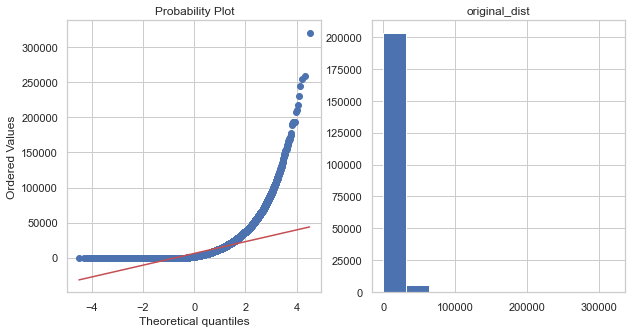

In [40]:
original_dist(df_new,'daily_decr90')

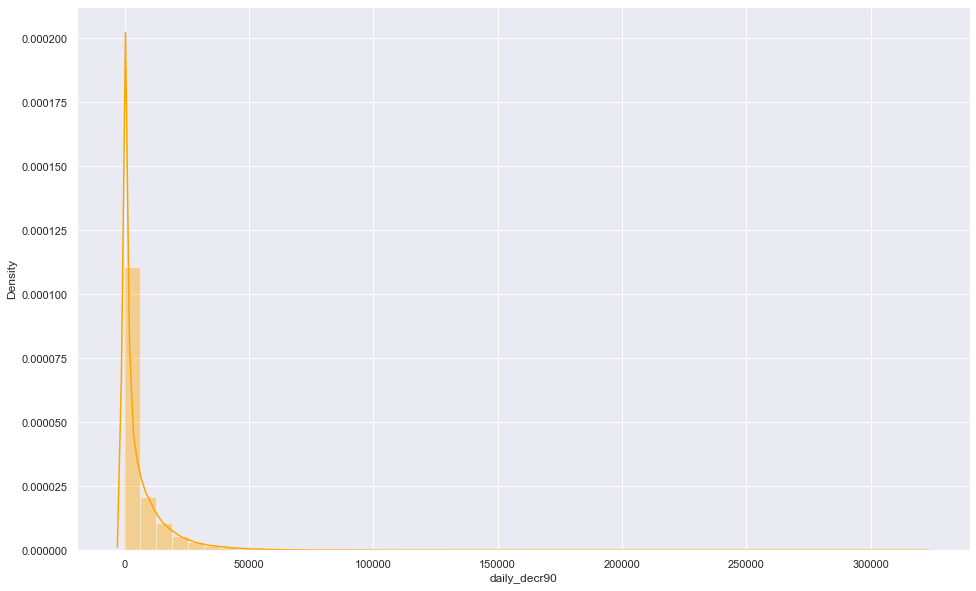

In [41]:
hist(df_new,'daily_decr90')

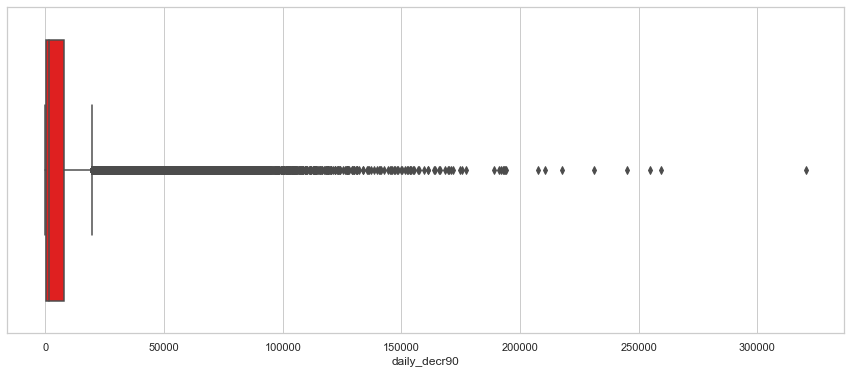

In [42]:
boxplot(df_new,'daily_decr90')

In [43]:
outlier_extreme(df_new,'daily_decr90')

lower_boundary: -23237.602000000003
uppper_boundary 31083.084000000003


In [44]:
##In daily_decr90 morw than 31083.084  values consider are outliers
df_new.loc[df_new['daily_decr90']>31083.084,'daily_decr90']=31083.084

In [45]:
df_new['daily_decr90'].describe()

count    209593.000000
mean       5509.237830
std        8159.046611
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max       31083.084000
Name: daily_decr90, dtype: float64

### rental30 feature

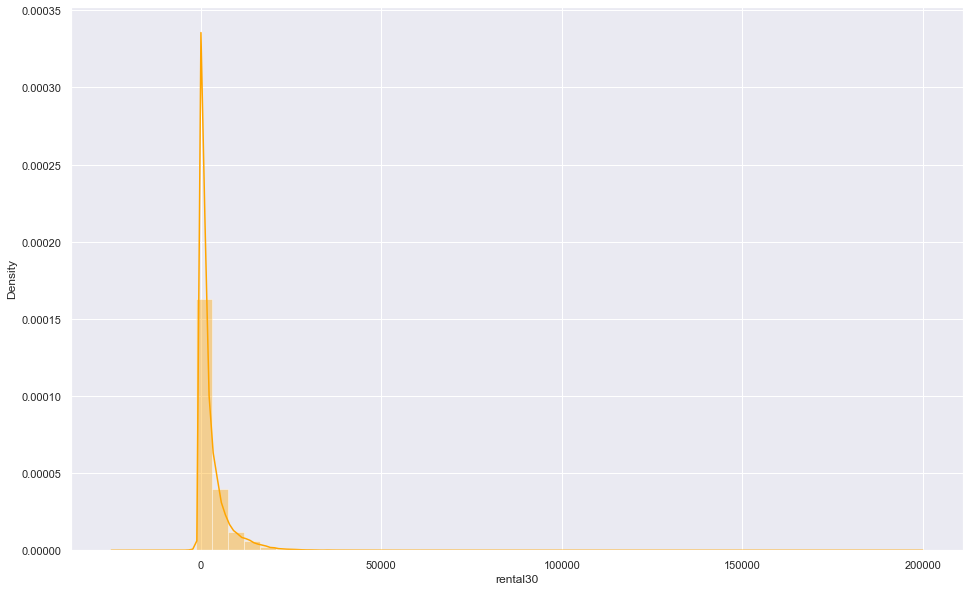

In [46]:
hist(df_new,'rental30')

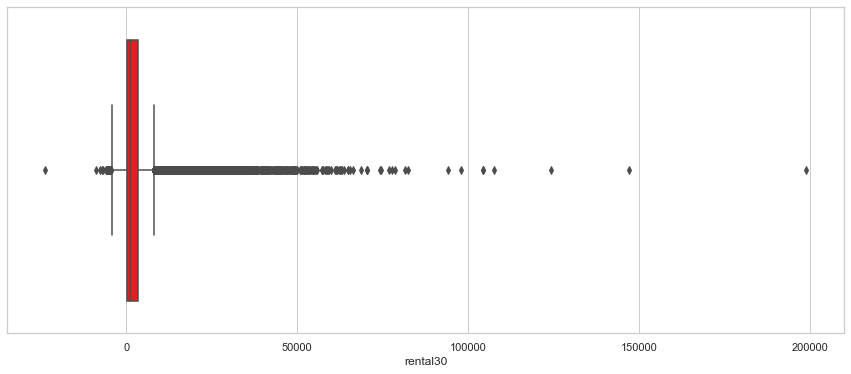

In [47]:
boxplot(df_new,'rental30')

In [48]:
outlier_extreme(df_new,'rental30')

lower_boundary: -8949.14
uppper_boundary 12586.5


In [49]:
df_new['rental30'].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

In [50]:
#In rental30 more than 12586.5 values consider as outliers

df_new.loc[df_new['rental30']>12586.5,'rental30']=12586.5

In [51]:
#In rental less than -8949.14  values consider as outliers
df_new.loc[df_new['rental30']<-8949.14,'rental30']=-8949.14

In [52]:
df_new['rental30'].describe()

count    209593.000000
mean       2474.040276
std        3278.813387
min       -8949.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max       12586.500000
Name: rental30, dtype: float64

### rental90 feature

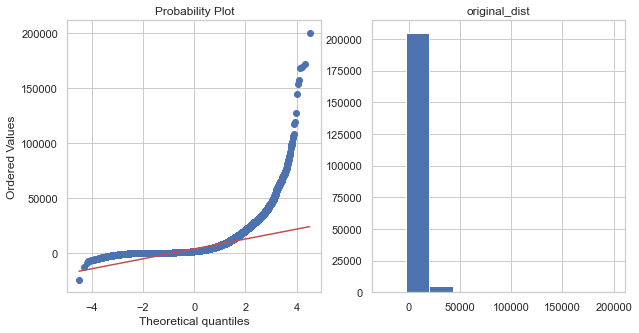

In [53]:
original_dist(df_new,'rental90')

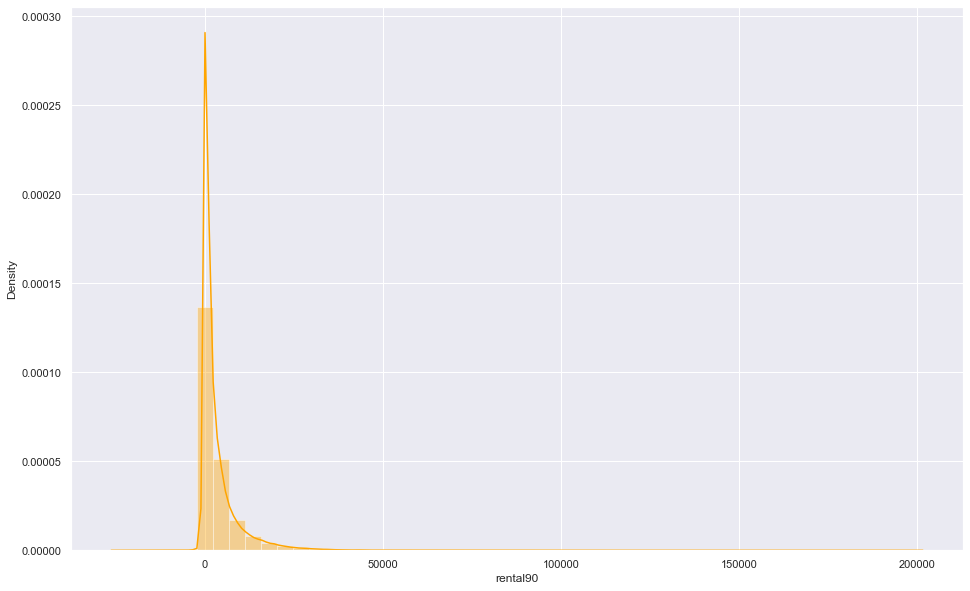

In [54]:
hist(df_new,'rental90')

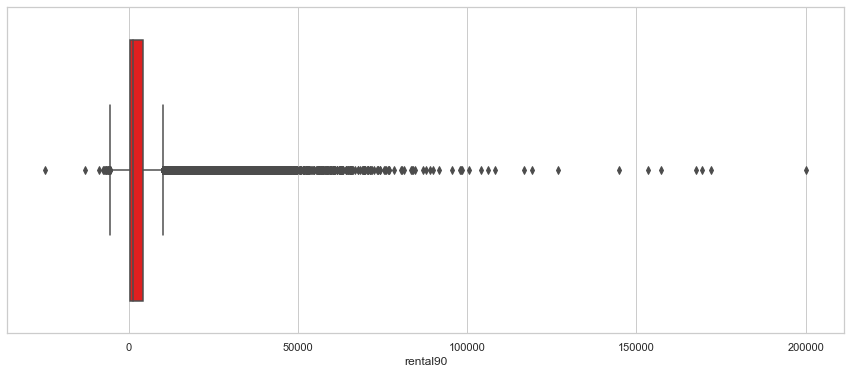

In [55]:
boxplot(df_new,'rental90')

In [56]:
df_new['rental90'].describe()

count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64

In [57]:
#rental90 has extreme outliers
outlier_extreme(df_new,'rental90')

lower_boundary: -11404.33
uppper_boundary 15906.380000000001


In [58]:
#In rental90 more than 15906 are consider as outliers
#in rental90 less than -11404.33 are consider as outliers


df_new.loc[df_new['rental90']>15906.38,'rental90']=15906.38
df_new.loc[df_new['rental90']<-11404.33,'rental90']=-11404.33

In [59]:
df_new['rental90'].describe()

count    209593.000000
mean       3142.870269
std        4217.639781
min      -11404.330000
25%         300.260000
50%        1334.000000
75%        4201.790000
max       15906.380000
Name: rental90, dtype: float64

### last_rech_amt_ma feature

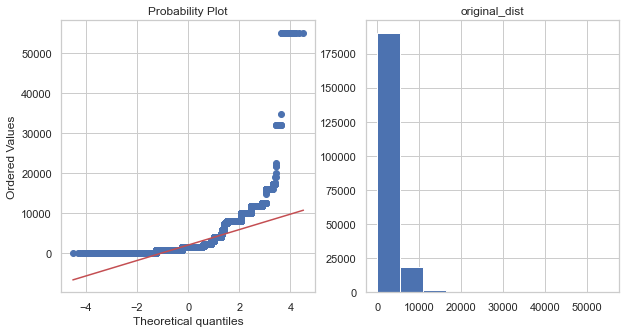

In [60]:
original_dist(df_new,'last_rech_amt_ma')

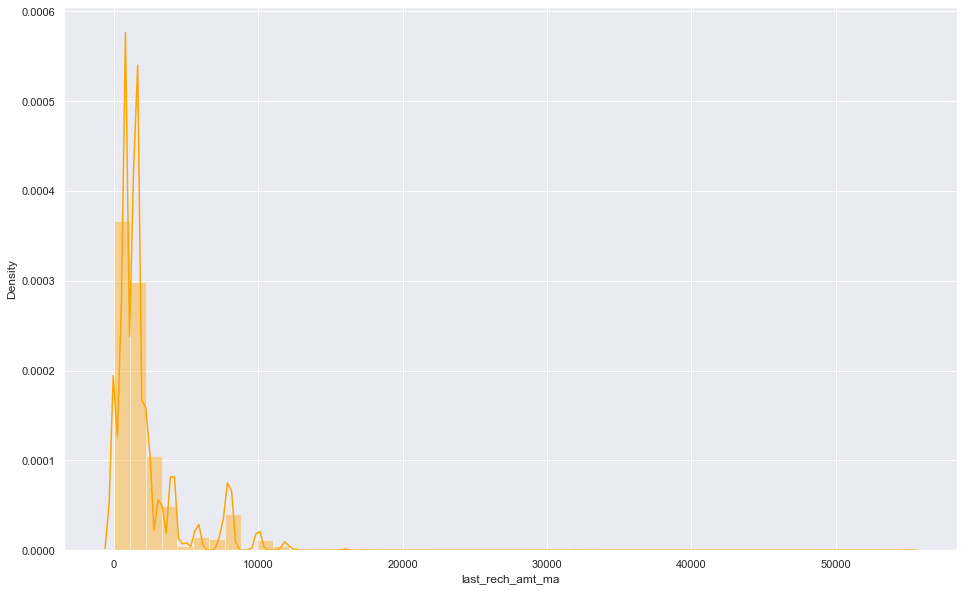

In [61]:
hist(df_new,'last_rech_amt_ma')

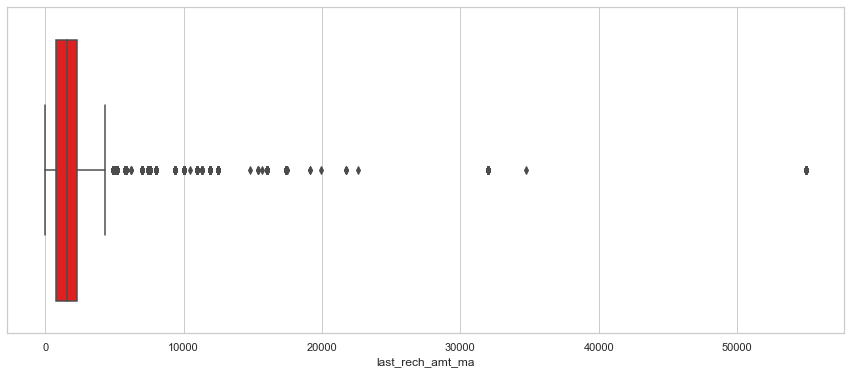

In [62]:
boxplot(df_new,'last_rech_amt_ma')

In [63]:
#we have extreme outliers in last_rech_amt_ma
outlier_extreme(df_new,'last_rech_amt_ma')

lower_boundary: -3847.0
uppper_boundary 6926.0


In [64]:
df_new['last_rech_amt_ma'].describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

In [65]:
#In last_rech_amt_ma more than 3190 values consider are outliers
df_new.loc[df_new['last_rech_amt_ma']>6926,'last_rech_amt_ma']=6926

### cnt_ma_rech30 feature

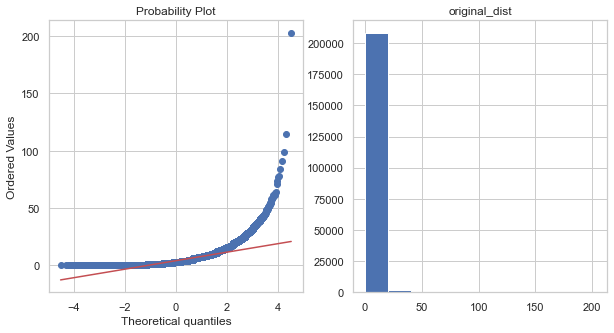

In [66]:
original_dist(df_new,'cnt_ma_rech30')

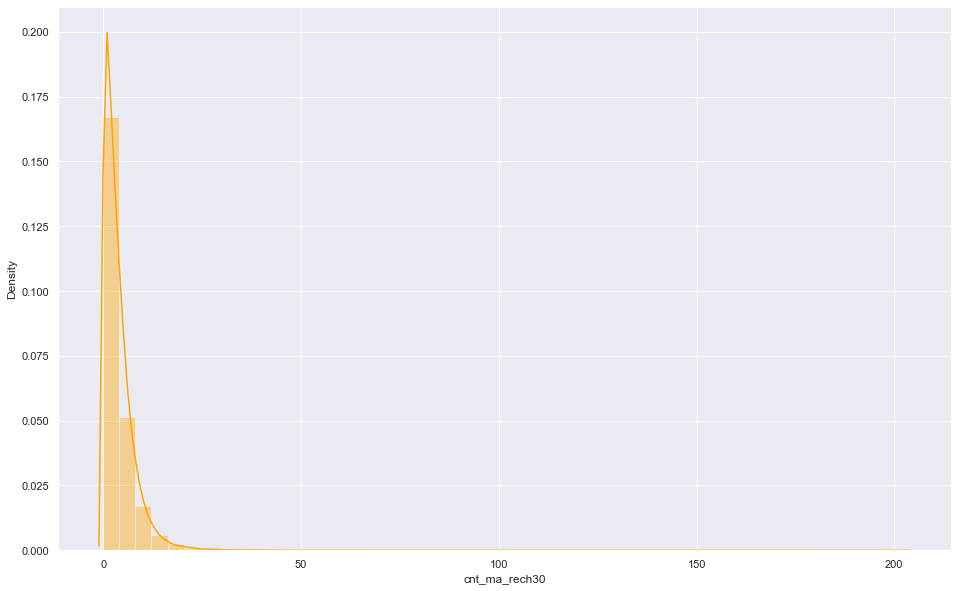

In [67]:
hist(df_new,'cnt_ma_rech30')

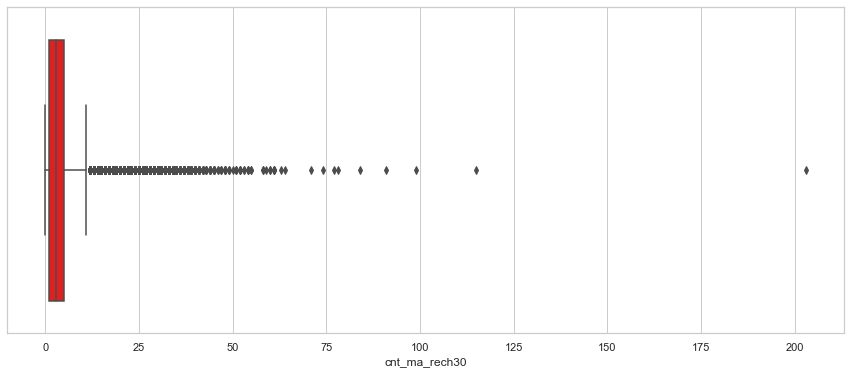

In [68]:
boxplot(df_new,'cnt_ma_rech30')

In [69]:
outlier_extreme(df_new,'cnt_ma_rech30')

lower_boundary: -11.0
uppper_boundary 17.0


In [70]:
df_new['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

In [71]:
#In cnt_ma_rech30 more than 17 values consider are outliers
df_new.loc[df_new['cnt_ma_rech30']>17,'cnt_ma_rech30']=17

In [72]:
df_new['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.880988
std           3.745748
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          17.000000
Name: cnt_ma_rech30, dtype: float64

### fr_ma_rech90 feature

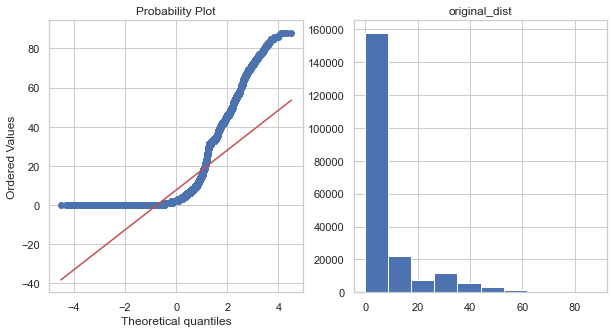

In [73]:
original_dist(df_new,'fr_ma_rech90')

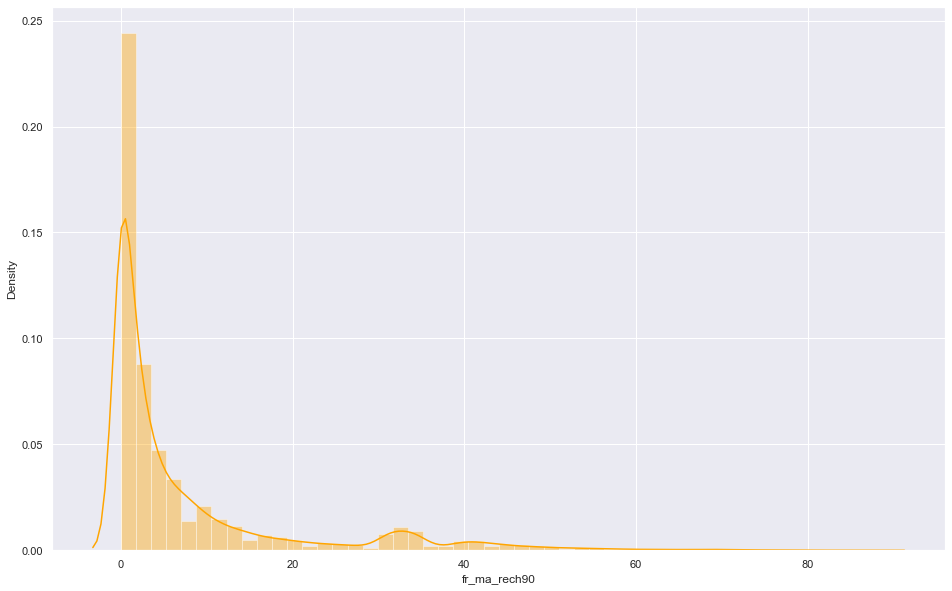

In [74]:
hist(df_new,'fr_ma_rech90')

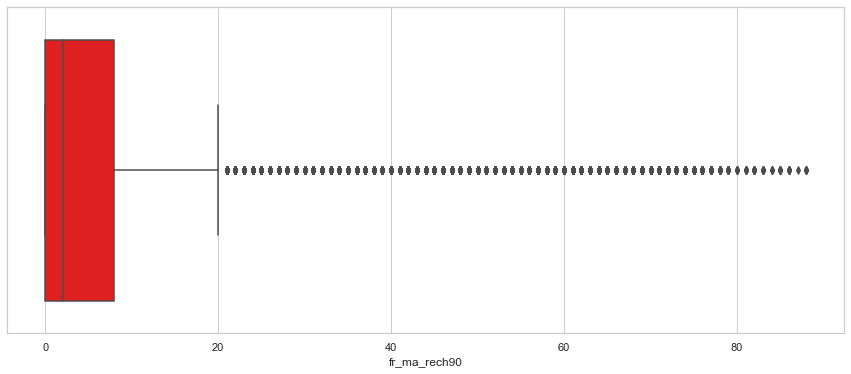

In [75]:
boxplot(df_new,'fr_ma_rech90')

In [76]:
df_new['fr_ma_rech90'].describe()

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

In [77]:
outlier_extreme(df_new,'fr_ma_rech90')

lower_boundary: -24.0
uppper_boundary 32.0


In [78]:
df_new.loc[df_new['fr_ma_rech90']>32,'fr_ma_rech90']=32

In [79]:
df_new['fr_ma_rech90'].describe()

count    209593.000000
mean          6.870807
std          10.000458
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          32.000000
Name: fr_ma_rech90, dtype: float64

### sumamnt_ma_rech30 feature

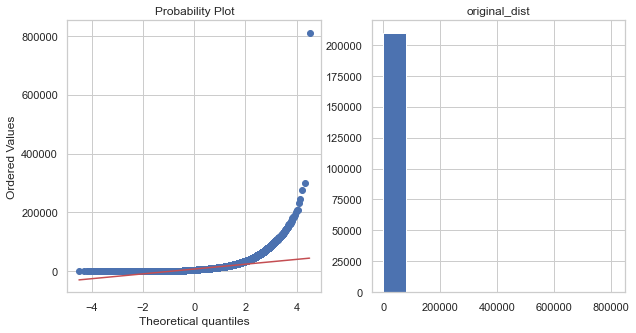

In [80]:
original_dist(df_new,'sumamnt_ma_rech30')

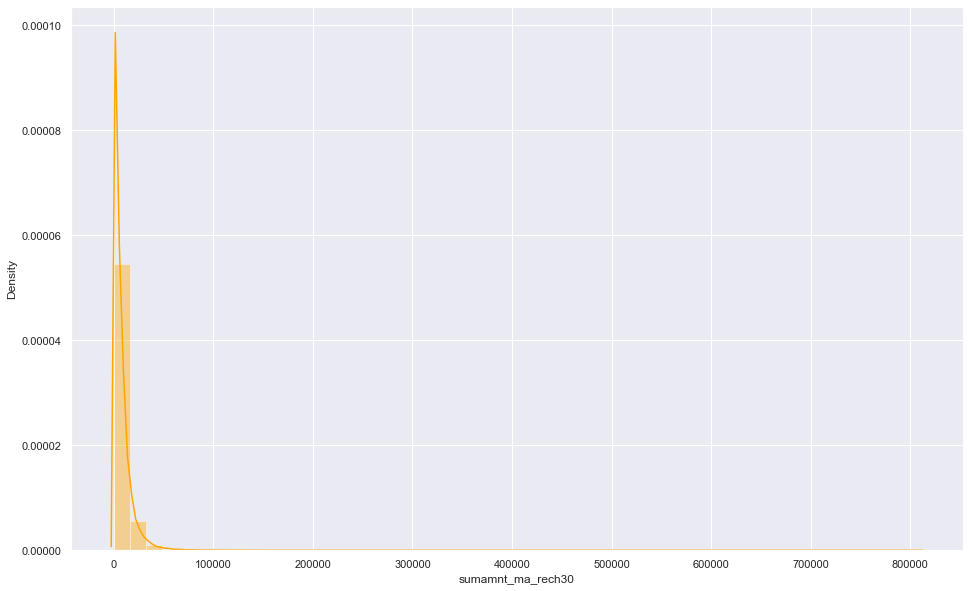

In [81]:
hist(df_new,'sumamnt_ma_rech30')

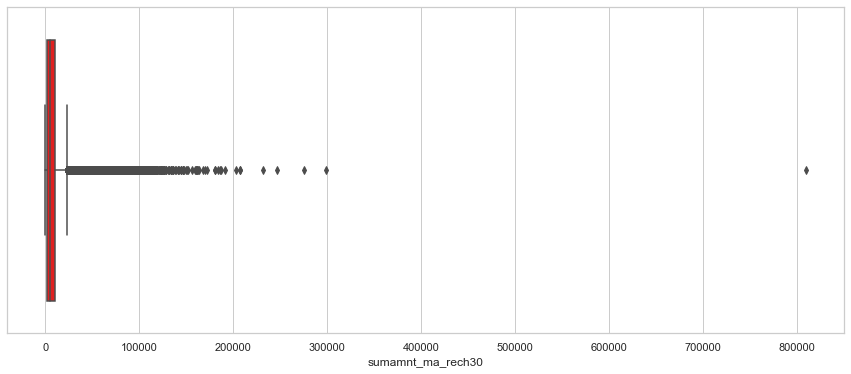

In [82]:
boxplot(df_new,'sumamnt_ma_rech30')

In [83]:
df_new['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

In [84]:
outlier_IQR(df_new,'sumamnt_ma_rech30')

lower_boundary: -11165.0
uppper_boundary 22715.0


In [85]:
#In sumamnt_ma_rech30 more than 22715 values consider are outliers
df_new.loc[df_new['sumamnt_ma_rech30']>22715,'sumamnt_ma_rech30']=22715

In [86]:
df_new['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       6861.071877
std        6612.799020
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max       22715.000000
Name: sumamnt_ma_rech30, dtype: float64

### medianamnt_ma_rech30 feature

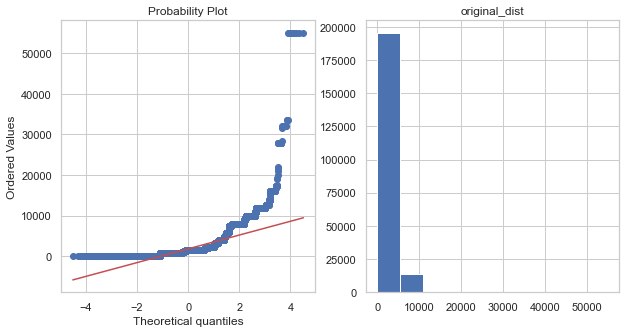

In [87]:
original_dist(df_new,'medianamnt_ma_rech30')

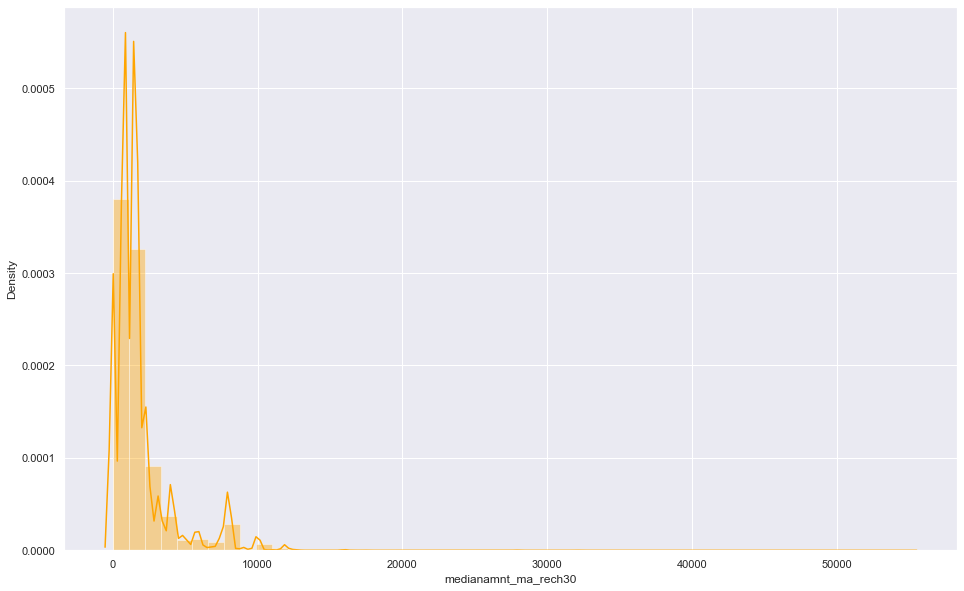

In [88]:
hist(df_new,'medianamnt_ma_rech30')

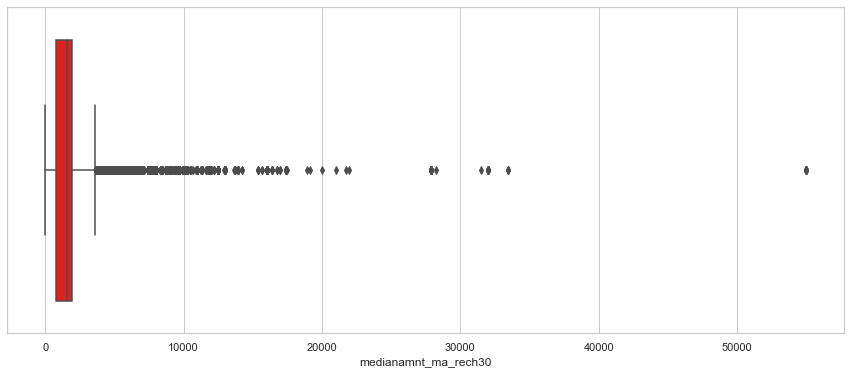

In [89]:
boxplot(df_new,'medianamnt_ma_rech30')

In [90]:
df_new['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

In [91]:
outlier_extreme(df_new,'medianamnt_ma_rech30')

lower_boundary: -2692.0
uppper_boundary 5386.0


In [92]:
#In medianamnt_ma_rech30 more than 5386 values consider as outliers
df_new.loc[df_new['medianamnt_ma_rech30']>5386,'medianamnt_ma_rech30']=5386

In [93]:
df_new['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1625.356851
std        1423.654678
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max        5386.000000
Name: medianamnt_ma_rech30, dtype: float64

### medianamnt_ma_rech30 feature

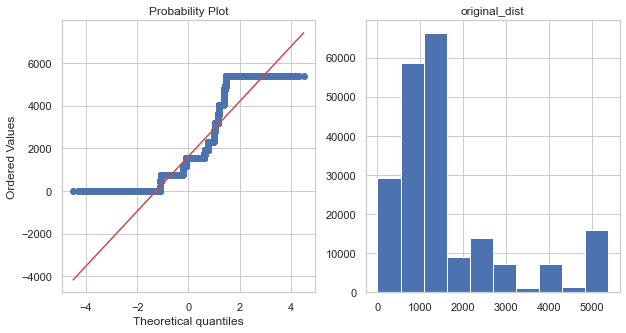

In [94]:
original_dist(df_new,'medianamnt_ma_rech30')

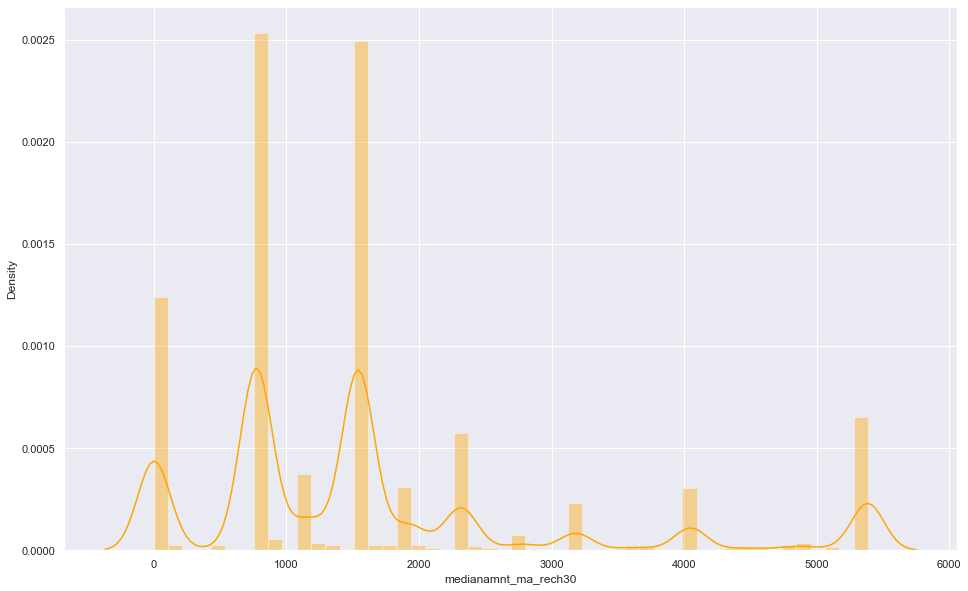

In [95]:
hist(df_new,'medianamnt_ma_rech30')

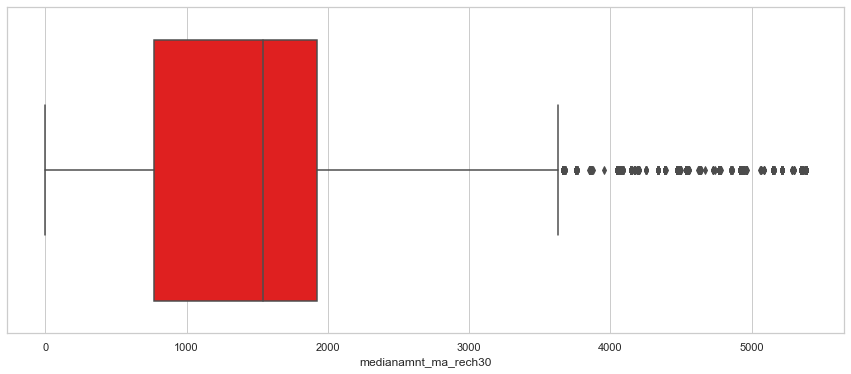

In [96]:
boxplot(df_new,'medianamnt_ma_rech30')

In [97]:
df_new['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1625.356851
std        1423.654678
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max        5386.000000
Name: medianamnt_ma_rech30, dtype: float64

In [98]:
outlier_IQR(df_new,'medianamnt_ma_rech30')

lower_boundary: -961.0
uppper_boundary 3655.0


In [99]:
# In medianamnt_ma_rech30 more than  values consider as outlier
df_new.loc[df_new['medianamnt_ma_rech30']>3655,'medianamnt_ma_rech30']=3655

In [100]:
df_new['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1475.941906
std        1079.392998
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max        3655.000000
Name: medianamnt_ma_rech30, dtype: float64

### cnt_ma_rech90 feature

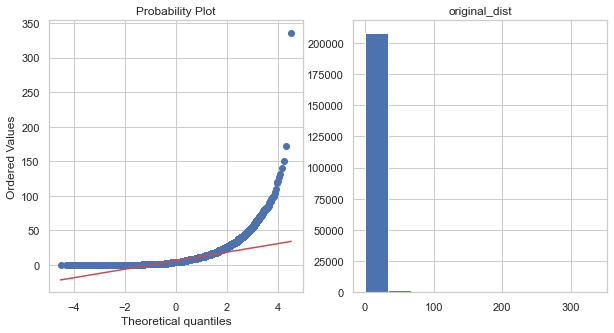

In [101]:
original_dist(df_new,'cnt_ma_rech90')

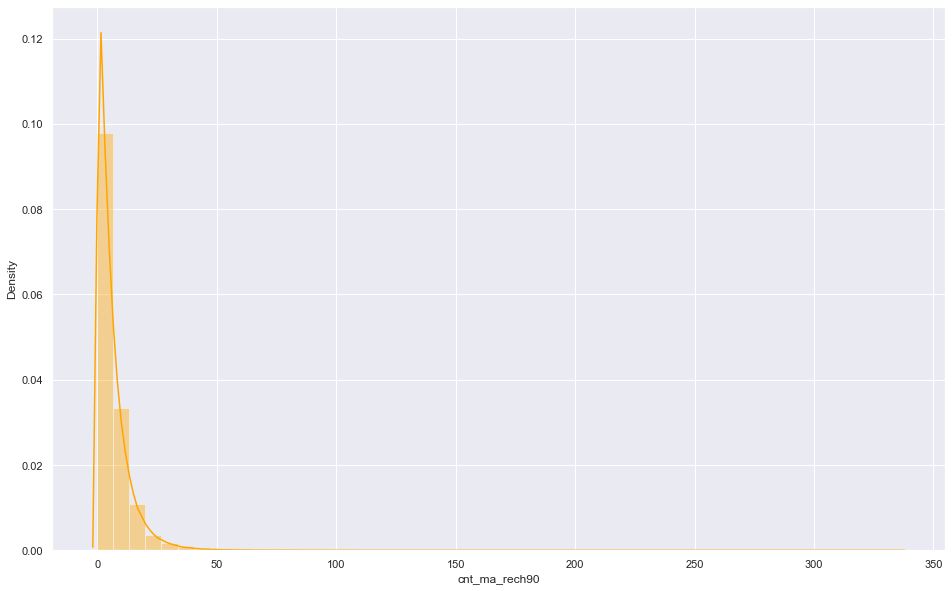

In [102]:
hist(df_new,'cnt_ma_rech90')

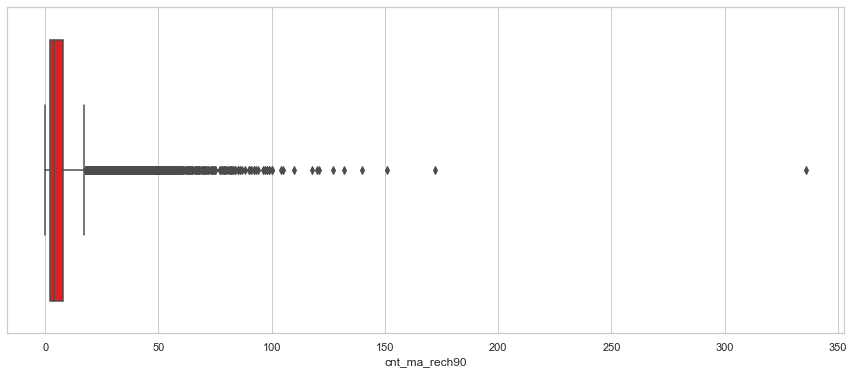

In [103]:
boxplot(df_new,'cnt_ma_rech90')

In [104]:
df_new['cnt_ma_rech90'].describe()

count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64

In [105]:
outlier_IQR(df_new,'cnt_ma_rech90')

lower_boundary: -7.0
uppper_boundary 17.0


In [106]:
#In cnt_ma_rech90 more than 17 is consider as outliers
df_new.loc[df_new['cnt_ma_rech90']>17,'cnt_ma_rech90']=17

### fr_ma_rech90 feature

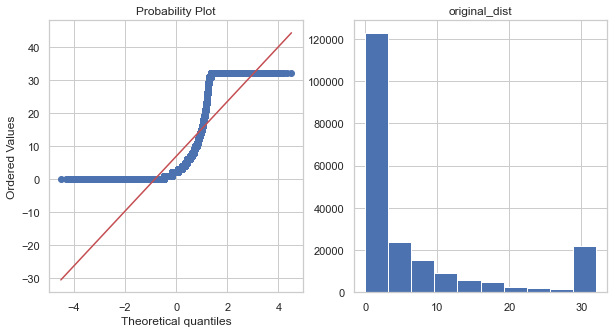

In [107]:
original_dist(df_new,'fr_ma_rech90')

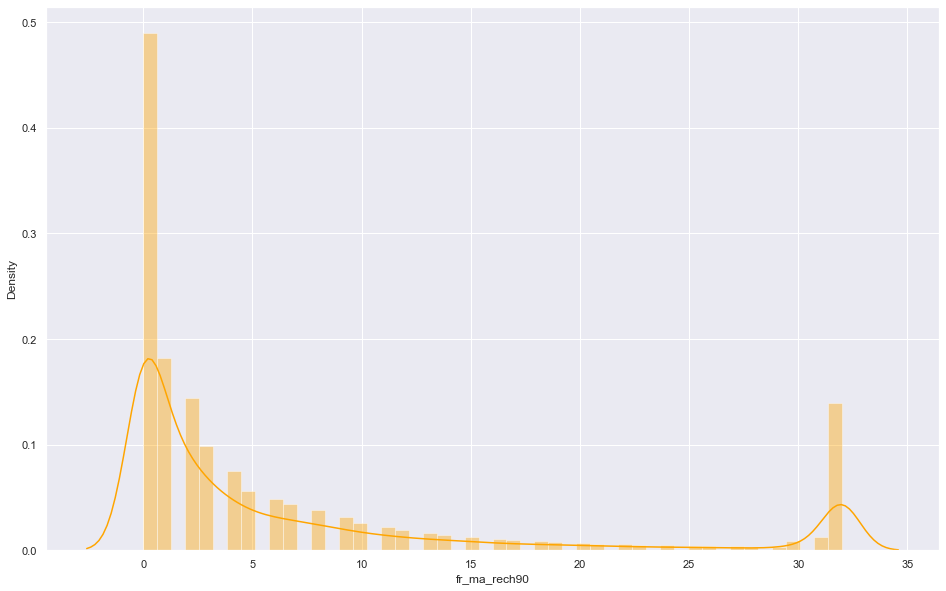

In [108]:
hist(df_new,'fr_ma_rech90')

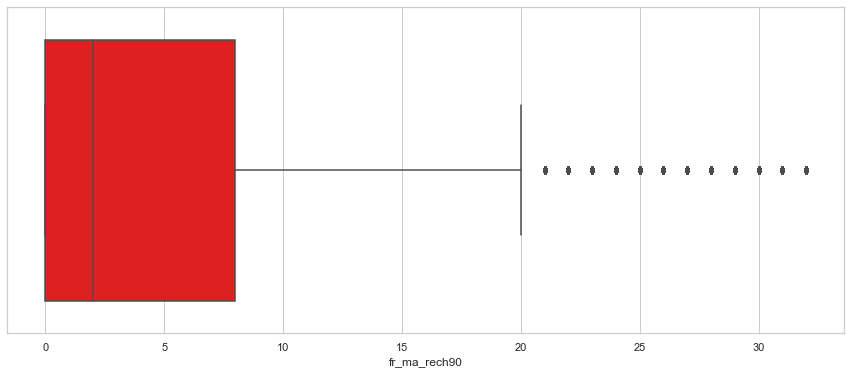

In [109]:
boxplot(df_new,'fr_ma_rech90')

In [110]:
df_new['fr_ma_rech90'].describe()

count    209593.000000
mean          6.870807
std          10.000458
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          32.000000
Name: fr_ma_rech90, dtype: float64

In [111]:
outlier_IQR(df_new,'fr_ma_rech90')

lower_boundary: -12.0
uppper_boundary 20.0


In [112]:
#In fr_ma_rech90 more than 20 consider as outliers
df_new.loc[df_new['fr_ma_rech90']>20,'fr_ma_rech90']=20

### sumamnt_ma_rech90 featur

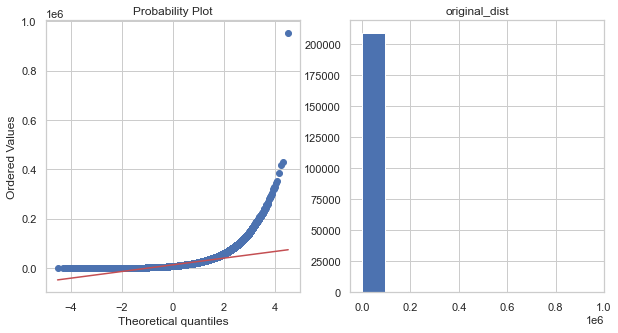

In [113]:
original_dist(df_new,'sumamnt_ma_rech90')

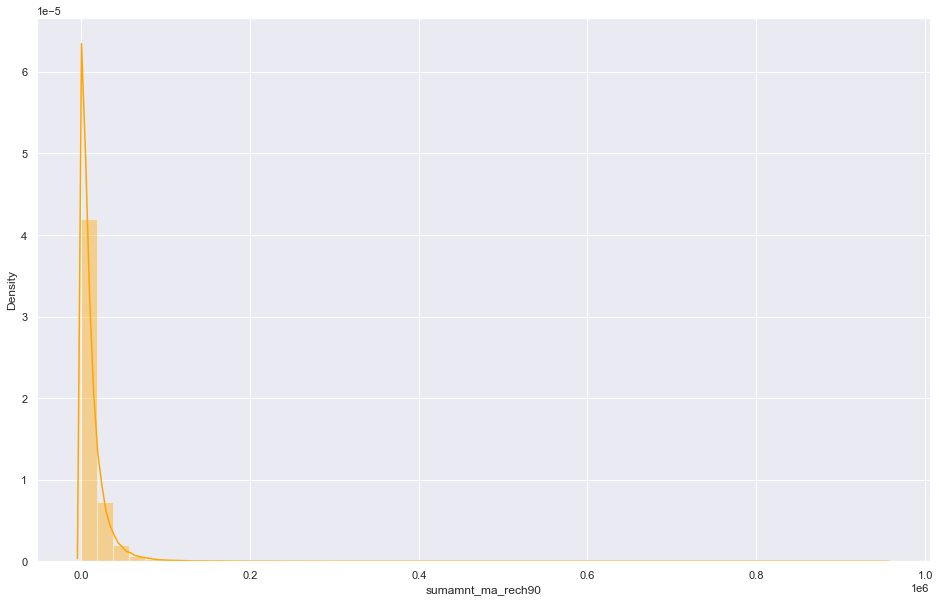

In [114]:
hist(df_new,'sumamnt_ma_rech90')

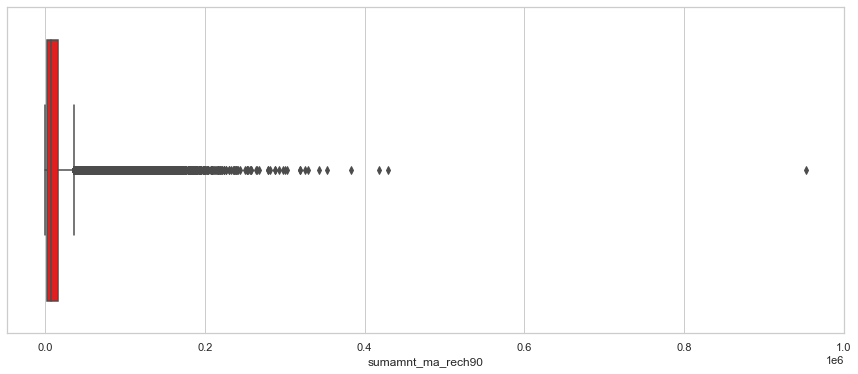

In [115]:
boxplot(df_new,'sumamnt_ma_rech90')

In [116]:
df_new['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

In [117]:
outlier_IQR(df_new,'sumamnt_ma_rech90')

lower_boundary: -18207.5
uppper_boundary 36524.5


In [118]:
df_new.loc[df_new['sumamnt_ma_rech90']>36524,'sumamnt_ma_rech90']=36524

In [119]:
df_new['sumamnt_ma_rech90'].describe()

count    209593.000000
mean      10878.687055
std       10788.933240
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max       36524.000000
Name: sumamnt_ma_rech90, dtype: float64

### medianamnt_ma_rech90 feature

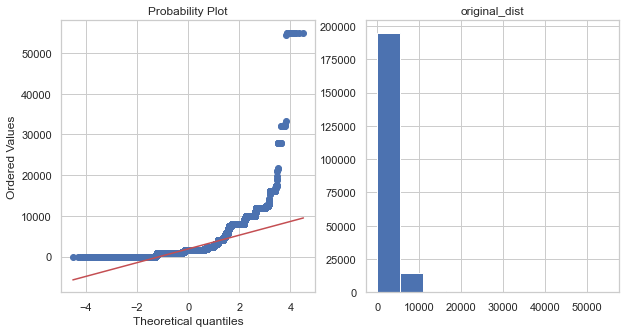

In [120]:
original_dist(df_new,'medianamnt_ma_rech90')

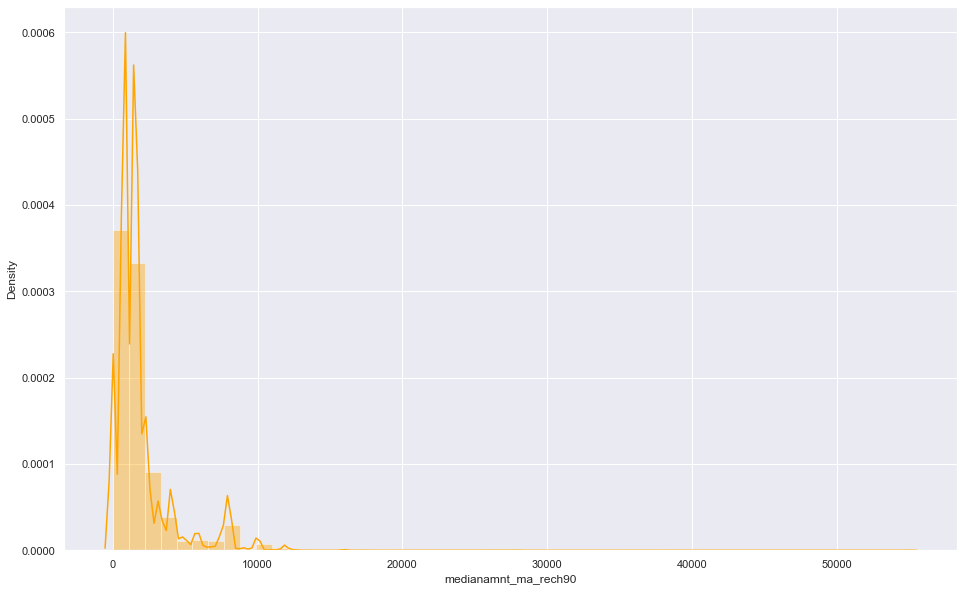

In [121]:
hist(df_new,'medianamnt_ma_rech90')

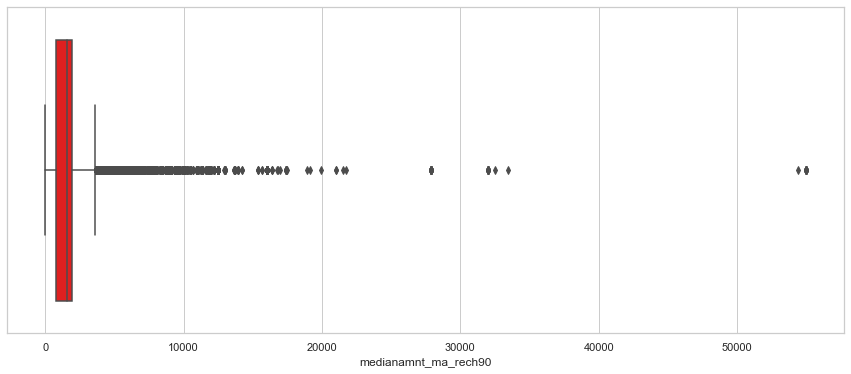

In [122]:
boxplot(df_new,'medianamnt_ma_rech90')

In [123]:
df['medianamnt_ma_rech90'].describe()

count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

In [124]:
outlier_extreme(df_new,'medianamnt_ma_rech90')

lower_boundary: -2680.0
uppper_boundary 5377.0


In [125]:
df_new.loc[df_new['medianamnt_ma_rech90']>5377,'medianamnt_ma_rech90']=5377

### medianmarechprebal90 feature

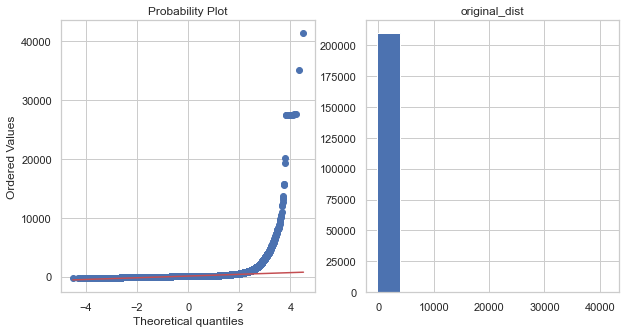

In [126]:
original_dist(df_new,'medianmarechprebal90')

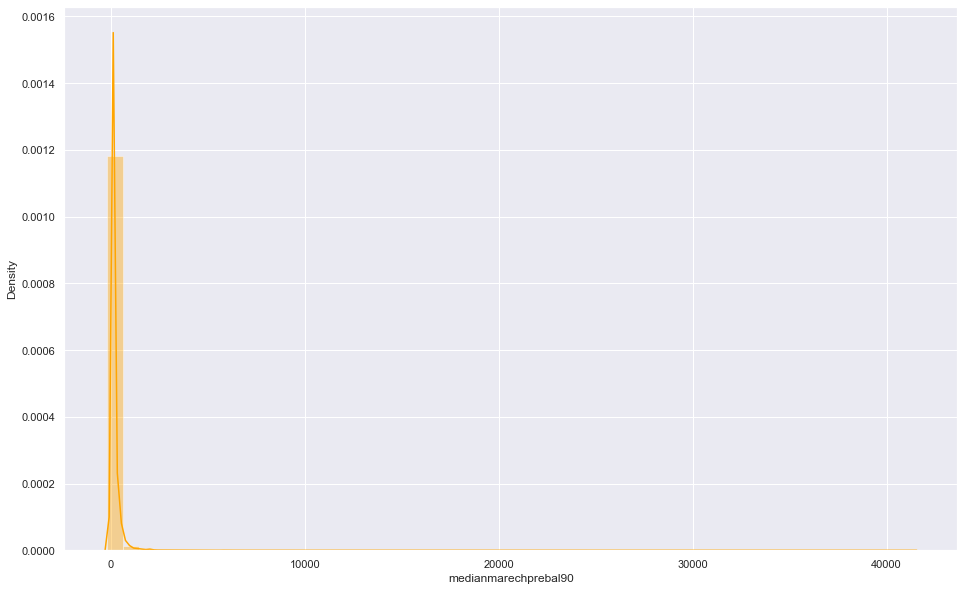

In [127]:
hist(df_new,'medianmarechprebal90')

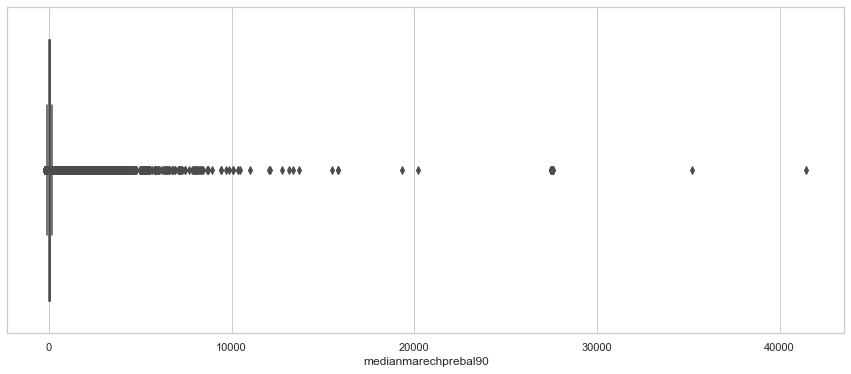

In [128]:
boxplot(df_new,'medianmarechprebal90')

In [129]:
df_new['medianmarechprebal90'].describe()

count    209593.000000
mean         92.025541
std         369.215658
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64

In [130]:
outlier_extreme(df_new,'medianmarechprebal90')

lower_boundary: -179.53000000000003
uppper_boundary 273.44000000000005


In [131]:
#In medianmarechprebal90 less than-179.53,more than 273.44 values are consider as outliers
df_new.loc[df_new['medianmarechprebal90']<-179.53,'medianmarechprebal90']=-179.53
df_new.loc[df_new['medianmarechprebal90']>273.44,'medianmarechprebal90']=273.44

### cnt_loans30 feature

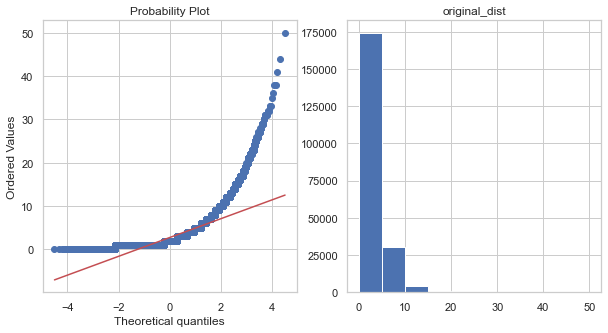

In [132]:
original_dist(df_new,'cnt_loans30')

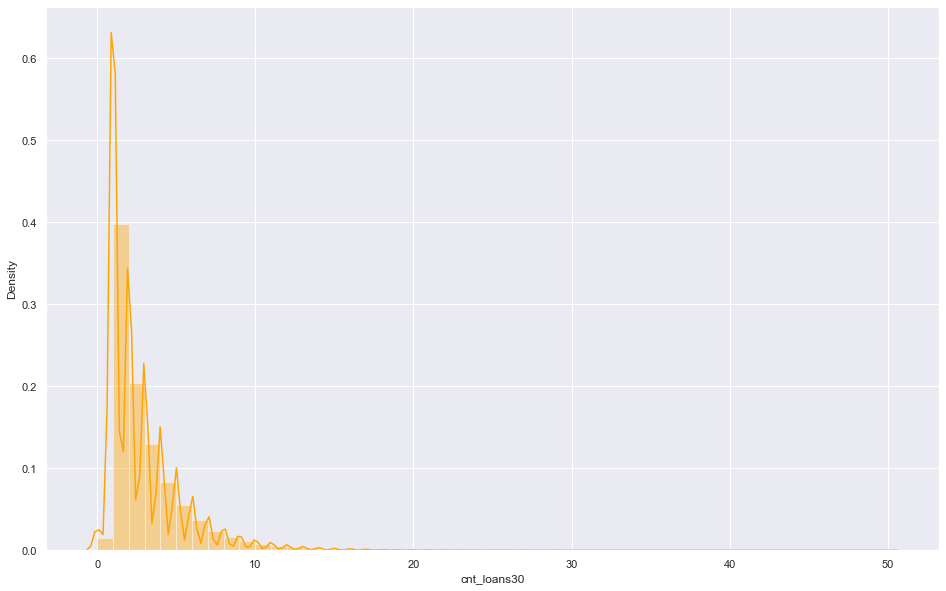

In [133]:
hist(df_new,'cnt_loans30')

In [134]:
boxplot(df_new,'cnt_loans30')

In [135]:
df_new['cnt_loans30'].describe()

count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

In [136]:
outlier_extreme(df_new,'cnt_loans30')

lower_boundary: -8.0
uppper_boundary 13.0


In [137]:
#In cnt_loans30 more than 13 values are consider as outlier
df_new.loc[df_new['cnt_loans30']>13,'cnt_loans30']=13

### amnt_loans30 feature

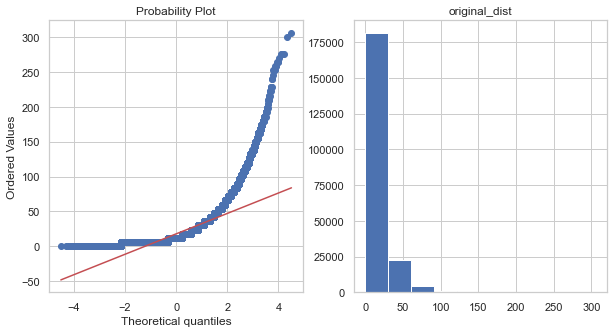

In [138]:
original_dist(df_new,'amnt_loans30')

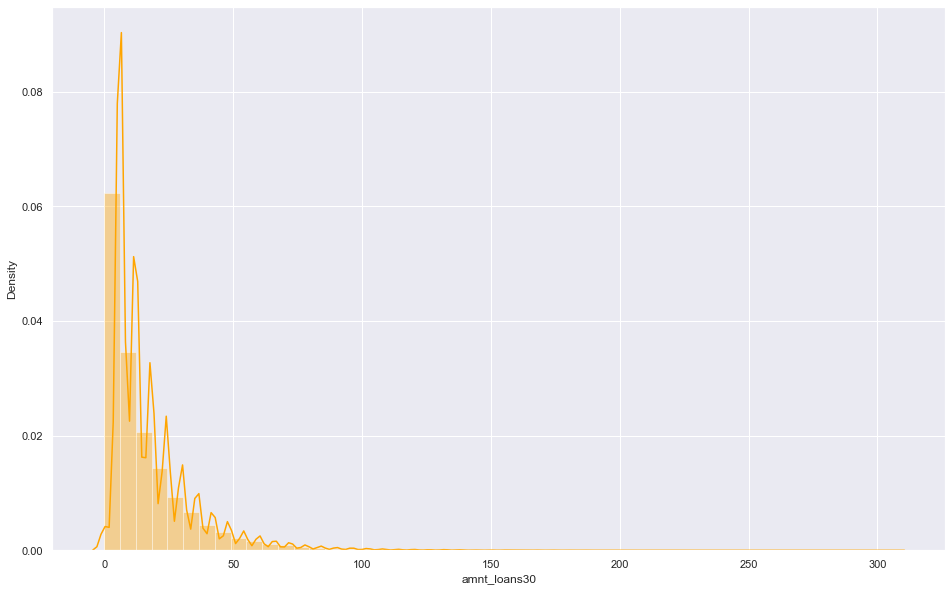

In [139]:
hist(df_new,'amnt_loans30')

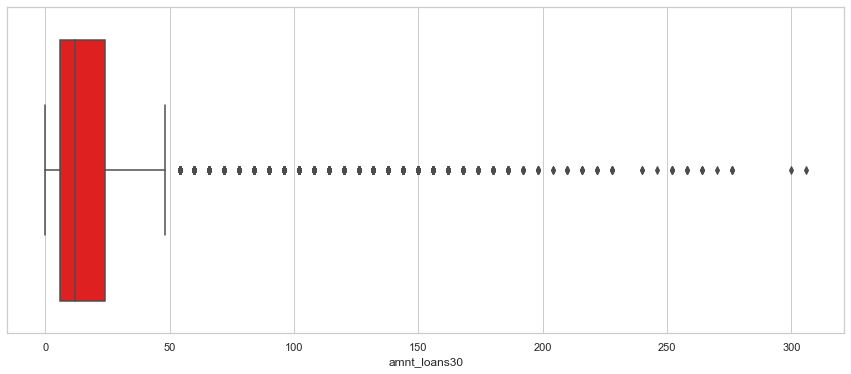

In [140]:
boxplot(df_new,'amnt_loans30')

In [141]:
df_new['amnt_loans30'].describe()

count    209593.000000
mean         17.952021
std          17.379741
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         306.000000
Name: amnt_loans30, dtype: float64

In [142]:
outlier_extreme(df_new,'amnt_loans30')

lower_boundary: -48.0
uppper_boundary 78.0


In [143]:
df_new.loc[df_new['amnt_loans30']>78,'amnt_loans30']=78

### amnt_loans90 feature

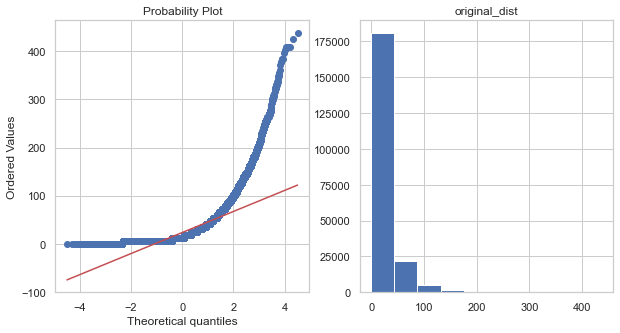

In [144]:
original_dist(df_new,'amnt_loans90')

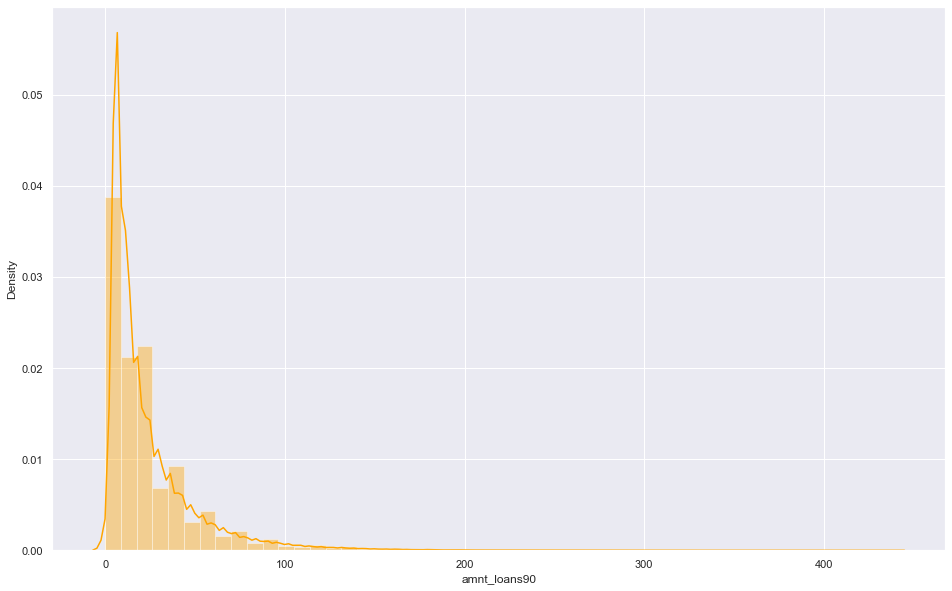

In [145]:
hist(df_new,'amnt_loans90')

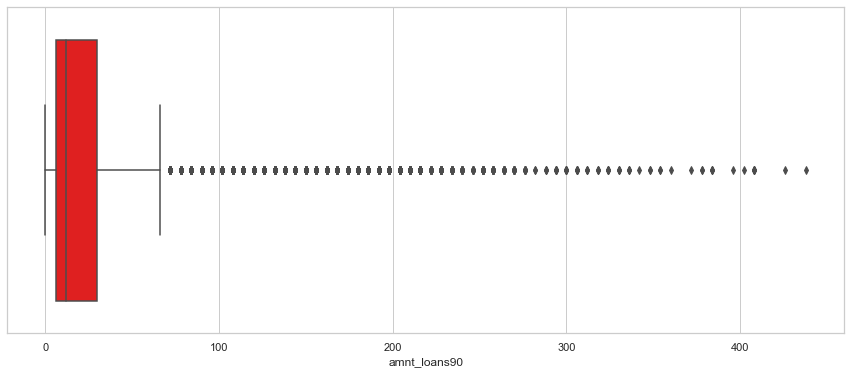

In [146]:
boxplot(df_new,'amnt_loans90')

In [147]:
df_new['amnt_loans90'].describe()

count    209593.000000
mean         23.645398
std          26.469861
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

In [148]:
outlier_extreme(df_new,'amnt_loans90')

lower_boundary: -66.0
uppper_boundary 102.0


In [149]:
df_new.loc[df_new['amnt_loans90']>102,'amnt_loans90']=102

### maxamnt_loans90 feature

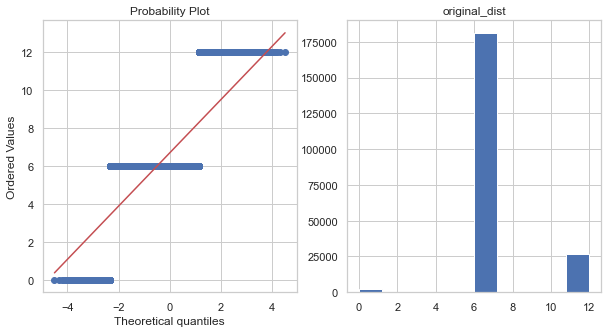

In [150]:
original_dist(df_new,'maxamnt_loans90')

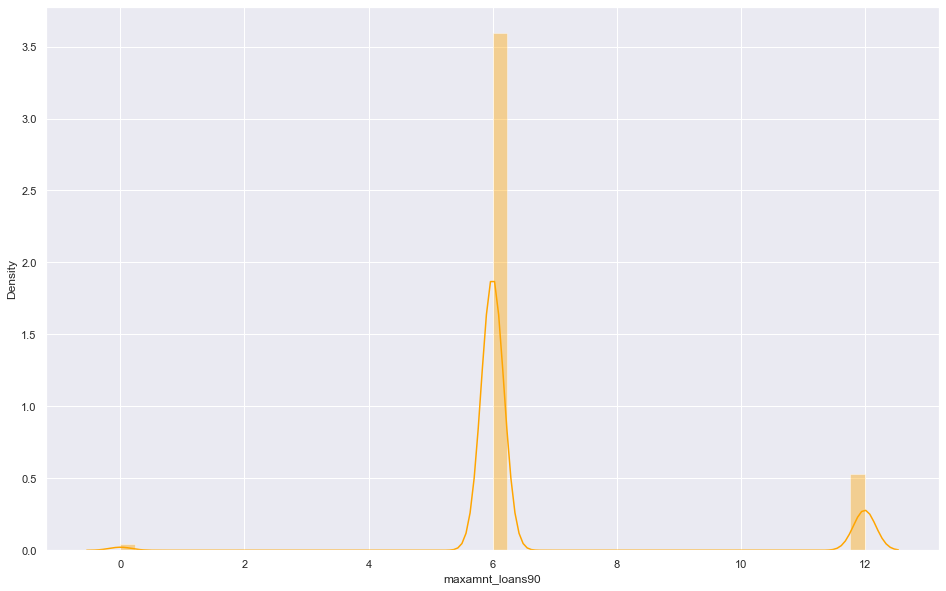

In [151]:
hist(df_new,'maxamnt_loans90')

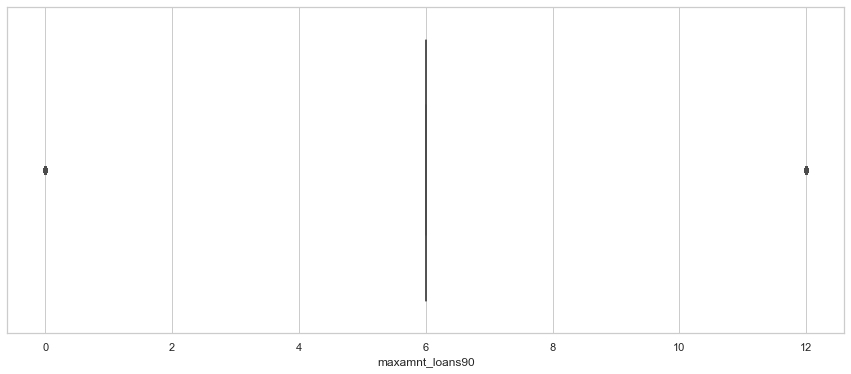

In [152]:
boxplot(df_new,'maxamnt_loans90')

In [153]:
df_new['maxamnt_loans90'].describe()

count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

In [154]:
outlier_norm(df_new,'maxamnt_loans90')

lower_boundary: 0.39154068912261764
uppper_boundary 13.01472764999176


In [155]:
df_new.loc[df_new['maxamnt_loans90']<4.173,'maxamnt_loans90']=4.173
df_new.loc[df_new['maxamnt_loans90']>7.71,'maxamnt_loans90']=7.71

In [156]:
df_new['maxamnt_loans90'].describe()

count    209593.000000
mean          6.199253
std           0.603334
min           4.173000
25%           6.000000
50%           6.000000
75%           6.000000
max           7.710000
Name: maxamnt_loans90, dtype: float64

### payback30 feature

In [157]:
original_dist(df_new,'payback30')

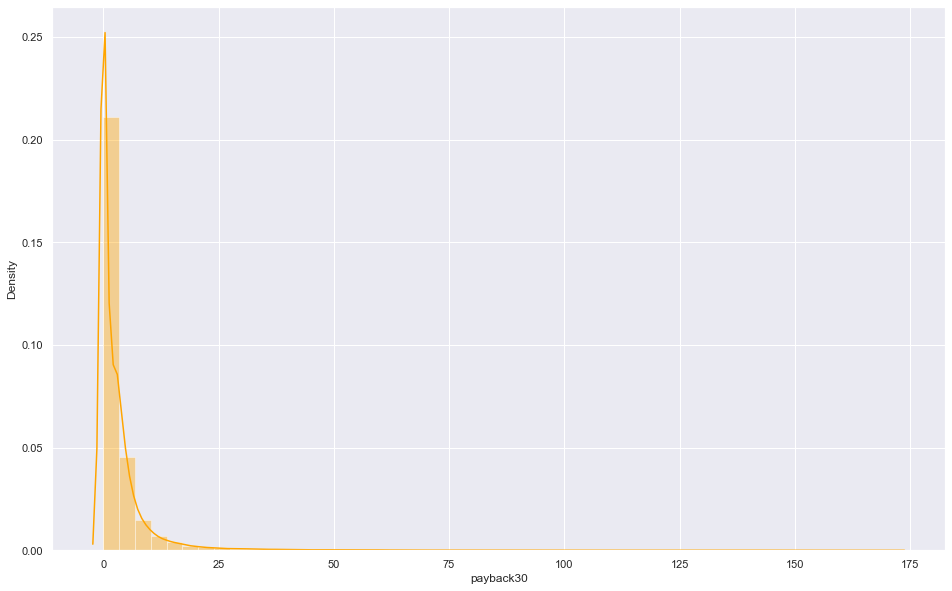

In [158]:
hist(df_new,'payback30')

In [159]:
boxplot(df_new,'payback30')

In [160]:
df_new['payback30'].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

In [161]:
outlier_norm(df_new,'payback90')

lower_boundary: -26.60283842665668
uppper_boundary 35.24580887812065


In [162]:
outlier_IQR(df_new,'payback30')

lower_boundary: -5.625
uppper_boundary 9.375


In [163]:
df_new.loc[df_new['payback30']>35.24,'payback30']=35.24

### payback90 feature

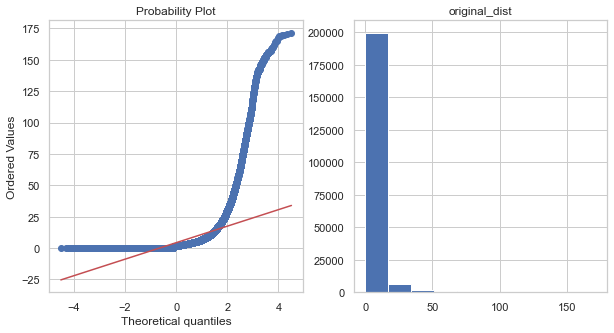

In [164]:
original_dist(df_new,'payback90')

In [165]:
hist(df_new,'payback90')

In [166]:
boxplot(df_new,'payback90')

In [167]:
df['payback90'].describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

In [168]:
outlier_extreme(df_new,'payback90')

lower_boundary: -13.5
uppper_boundary 18.0


In [169]:
df_new.loc[df_new['payback90']>18,'payback90']=18

## spliting the dataset

In [170]:
x=df_new.drop("label",axis=1)
y=df_new["label"]

In [171]:
x.shape

(209593, 19)

In [172]:
y.shape

(209593,)

In [173]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

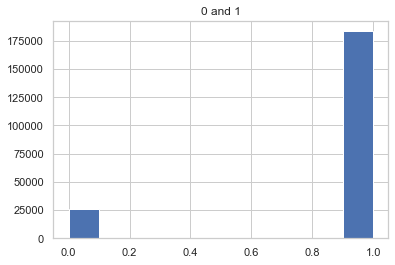

In [174]:
y.hist(grid=True)
plt.title("0 and 1")
plt.show()

Dataset is imblearn

### Resmapling the dataset

In [175]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_res,y_res=os.fit_resample(x,y)

In [176]:
x_res.shape,y_res.shape

((366862, 19), (366862,))

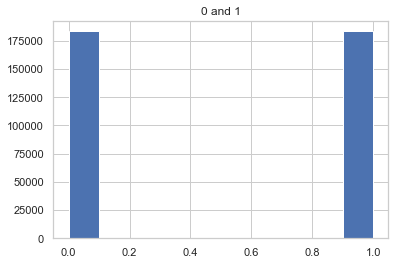

In [177]:
y_res.hist(grid=True)
plt.title("0 and 1")
plt.show()

### Finding best random_state

In [178]:
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 0.9333333333333333 on random_state 53


### Creating train_test_split

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=53)

## Test the model

In [180]:
#from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))
print("roc_auc_score:",roc_auc_score(y_test,lr.predict(x_test)))

accuracy score: 0.9333333333333333
confusion matrix: [[16  1]
 [ 1 12]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

roc_auc_score: 0.9321266968325792


In [181]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))
print("roc_auc_score:",roc_auc_score(y_test,dt.predict(x_test)))

accuracy score: 1.0
confusion matrix: [[17  0]
 [ 0 13]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

roc_auc_score: 1.0


In [182]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))
print("roc_auc_score:",roc_auc_score(y_test,rf.predict(x_test)))

accuracy score: 1.0
confusion matrix: [[17  0]
 [ 0 13]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

roc_auc_score: 1.0


In [183]:
nb=GaussianNB()
nb.fit(x_train,y_train)
pred=nb.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))
print("roc_auc_score:",roc_auc_score(y_test,nb.predict(x_test)))

accuracy score: 0.8333333333333334
confusion matrix: [[16  1]
 [ 4  9]]
classification report:               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.84      0.83      0.83        30

roc_auc_score: 0.8167420814479638


### cross validation score

In [184]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.877185787775003


In [185]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.8645613260896153


In [186]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.909338582943289


In [187]:
scr=cross_val_score(nb,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.6165520912003217


calculate the difference between accuracy score and cross validation score to know the best model

the less difference of accuracy score and cross validation score is Logistic Regression

### Hyper parameter tuning

In [188]:
#from sklearn.model_selection import RandomizedSearchCV
#creating parameter list to pass in RandomizedSearchCV

parameters=[{'penalty':['l1','l2','elasticnet','none'],
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000]}]

In [191]:
RCV=RandomizedSearchCV(lr,parameters,cv=5)

In [192]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [193]:
RCV.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 5000}

In [190]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lr,parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [196]:
mod=LogisticRegression(penalty='l2',
    solver='newton-cg',
    max_iter=5000,random_state=53)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.66666666666667


### Saving the model

In [197]:
import joblib
joblib.dump(mod,"micro_credit_finance_project.pkl")

['micro_credit_finance_project.pkl']

## Loading the saved model

In [198]:
model=joblib.load("micro_credit_finance_project.pkl")

In [199]:
prediction=model.predict(x_test)

In [200]:
print(accuracy_score(y_test,prediction)*100)

86.66666666666667
